In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('train.csv')
df.head()

,id,REFLEC1,REFLEC2,REFLEC3,REFLEC4,REFLEC5,REFLEC6,REFLEC7,PCA1,PCA2,...,DOSEL1,VVR1,VHR1,VHVVR1,VVD1,VHD1,VHVVD1,MNDWI1,NDTI1,Target
0,id_0taivml7ol,231.0,251.0,496.0,464.0,2557.0,2035.0,1051.0,15578.91895,672.583374,...,17.0,0.174004,0.038816,0.222946,0.145658,0.036469,0.250200,-0.608060,0.318859,80
1,id_croxu0xdq9,345.0,402.0,805.0,805.0,2997.0,2443.0,1434.0,16403.79688,900.683044,...,6.0,0.239050,0.055795,0.233304,0.130232,0.035914,0.275557,-0.504310,0.260253,39
2,id_qfv0klgl9b,413.0,518.0,775.0,1022.0,2936.0,3266.0,2351.0,17203.26953,1275.056519,...,0.0,0.114193,0.028076,0.245645,0.041095,0.007986,0.193860,-0.616432,0.162898,26
3,id_mlubcnl27r,196.0,295.0,806.0,675.0,2964.0,2249.0,1260.0,16105.81738,900.010620,...,0.0,0.177530,0.057263,0.322373,0.069336,0.008118,0.116911,-0.472340,0.281847,96
4,id_rej7e1nz2p,366.0,404.0,697.0,803.0,2479.0,2722.0,1794.0,16414.72266,822.154480,...,0.0,0.153453,0.035333,0.230104,0.104264,0.022265,0.213336,-0.592278,0.205492,98


In [12]:
df.columns

Index(['id', 'REFLEC1', 'REFLEC2', 'REFLEC3', 'REFLEC4', 'REFLEC5', 'REFLEC6',
       'REFLEC7', 'PCA1', 'PCA2', 'PCA3', 'NDVI1', 'NDVI2', 'NDVI3', 'NDVI4',
       'ELEV1', 'PEND1', 'ILUM1', 'TOPOIND1', 'ROUGH1', 'TRI1', 'COFS1',
       'TMPMAN1', 'TMPMAX1', 'TMPMIN1', 'TVARDAY1', 'PRECIPAN1', 'PRECIPWET1',
       'PRECIPDRY1', 'PRECIPVAR1', 'MARTONNE1', 'LAT2', 'LON1', 'DOSEL1',
       'VVR1', 'VHR1', 'VHVVR1', 'VVD1', 'VHD1', 'VHVVD1', 'MNDWI1', 'NDTI1',
       'Target'],
      dtype='object')

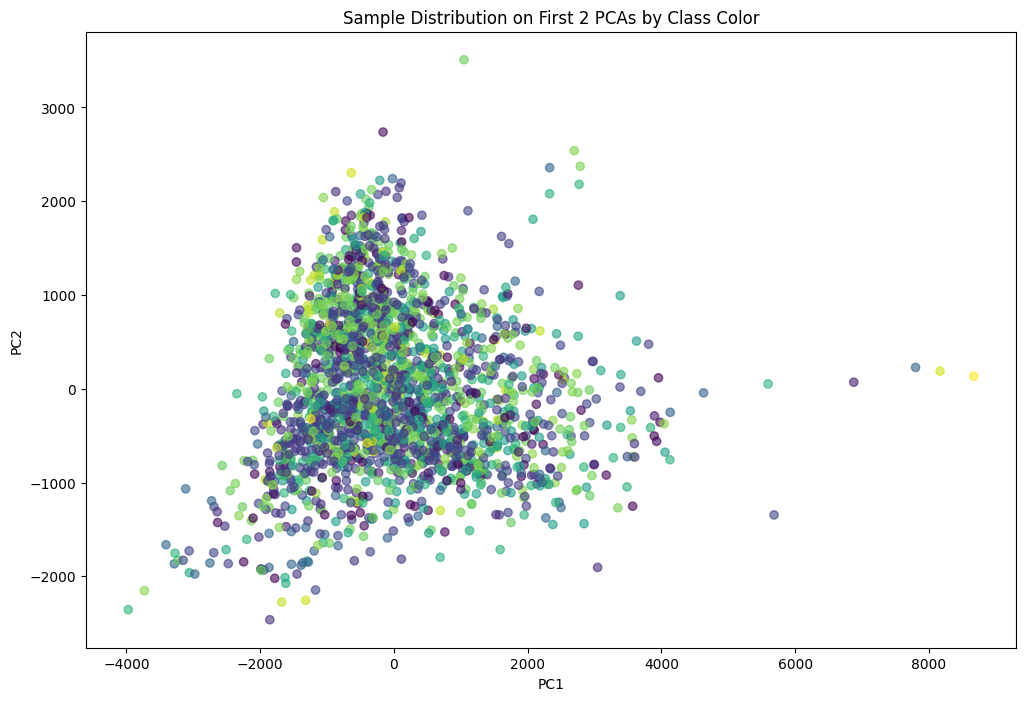

In [15]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(df.drop('id',axis=1))
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['pc1', 'pc2']

plt.figure(figsize=(12,8))
plt.title('Sample Distribution on First 2 PCAs by Class Color')
plt.scatter(x_pca['pc1'], x_pca['pc2'], alpha = .6, c=df['Target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [17]:
#DBscan clustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

In [18]:
X,y=make_circles(n_samples=752,factor=0.3,noise=0.1)

In [19]:
X

array([[-0.03342169, -0.46648711],
       [-0.413963  ,  0.18731299],
       [-0.92517658,  0.24674613],
       ...,
       [ 0.33979228,  0.16143194],
       [ 0.2999915 ,  0.21094855],
       [-0.04199955, -1.02482324]])

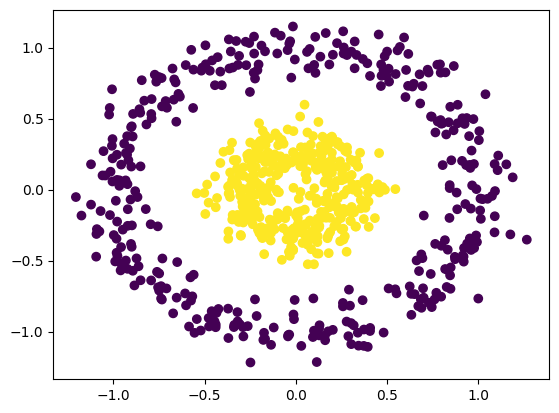

In [21]:
plt.scatter(X[:,0],X[:,1],c=y)

In [36]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.07)
dbscan.fit_predict(X)

array([ 0, -1,  1,  0,  2, 20,  0, -1,  0, -1, -1,  0,  3,  0,  0, -1, -1,
        4, -1, -1,  5,  3,  0, -1,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  6,  5,  0, -1, -1,  0,  4,  5,  7,  0, -1,  8,
        0,  0, -1, -1, 14,  0, 20, -1,  0,  0, -1, -1, -1,  4,  9,  6,  0,
       20, -1, -1,  8,  9,  0, -1,  0, -1, -1,  0, 11,  0,  0, 12, -1,  3,
       10, -1,  0,  0,  0, -1, -1,  0, -1, 17, -1,  0,  0, -1,  0,  0,  0,
        8,  3,  0, 13, -1,  0,  0, -1, 11,  1,  0, 16,  8, 12, -1, -1, 13,
        0, -1,  0,  0, -1, 12,  0,  0,  0,  0, -1, -1,  0,  0,  5,  0,  0,
       -1, -1, -1,  0,  0, 14,  0,  0, 22,  0,  0,  0, -1, -1,  0,  0, 15,
        0,  0,  0,  2,  0, -1,  6,  0,  0,  0, -1,  0, 11,  0, 13, -1,  0,
       -1,  0,  0,  0, 21, -1, -1,  0,  1, -1, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, 14,  8, 16,  0,  0,  3, -1, -1,  3,  8, 12, 16,
        0, 16,  3,  0,  0,  0,  0,  2, 16, -1,  0, 15,  1,  0,  0,  0,  0,
       -1,  0, 15, 18,  0

In [28]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

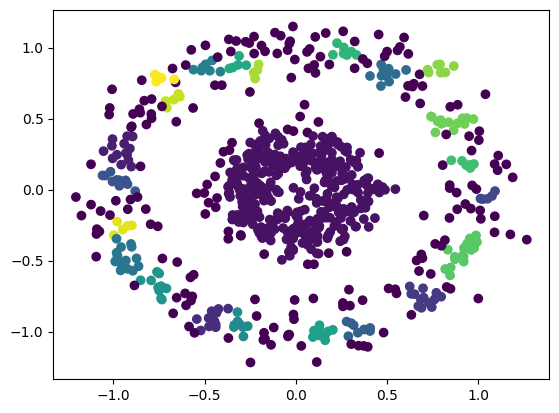

In [37]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

In [44]:
#local outlier factor
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=10,contamination=0.1)
y_pred=clf.fit_predict(X)

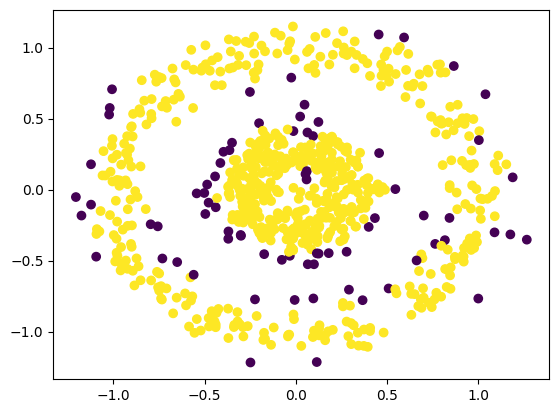

In [45]:
plt.scatter(X[:,0],X[:,1],c=y_pred)